In [1]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset
df = pd.read_csv('E:/Research--Thesis/Data Set/strokeDataNoMissingValueUpdated.csv')

In [3]:
df.head()

,Gender,Age,Work Type,Residence Area,Married,Hyper Tension,Heart Disease,Smoking,Average Glucose Level,Weight(Kg),...,Serum Cholesterol,LDL,HDL,Triglyceried,HbA1c,Hb,RBC,WBC,ESR,Brain Stroke
0,1,85,3,1,1,1,0,0,8.0,62,...,158,90,48,98,8.863526,12.80,4.260000,12.00,20,1
1,1,85,4,0,1,1,0,0,7.0,55,...,167,108,44,101,8.863526,12.70,4.400000,10.85,9,1
2,1,65,5,0,1,1,0,0,5.0,50,...,167,108,44,106,8.863526,11.91,4.300000,4.00,6,1
3,1,55,1,0,1,1,0,0,5.2,70,...,141,73,47,104,10.200000,13.90,4.902467,20.00,35,1
4,1,65,1,1,1,1,1,0,7.1,50,...,156,81,40,169,8.863526,13.80,5.150000,9.00,13,1


In [4]:
#separate data and brain stroke
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
#Split train test data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 42)  

In [7]:
#Check number of brain stroke (yes) and brain stroke (no)  in the train data
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 112, 1: 157}

In [8]:
#Check number of brain stroke (yes) and brain stroke (no)  in the test data
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 39, 1: 77}

In [9]:
# Apply the random under-sampling for train dataset ( balance of train data)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True, random_state = 42)
X_train, y_train, idx_resampled = rus.fit_sample(X_train, y_train)

In [10]:
# Apply the random under-sampling for testing dataset (balance of test data)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True, random_state = 42)
X_test, y_test, idx_resampled = rus.fit_sample(X_test, y_test)

In [11]:
#Check number of brain stroke (yes) and brain stroke (no)  in the train data
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 112, 1: 112}

In [12]:
#Normalize the train dataset
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)

In [13]:
#Normalized the test dataset
X_test = min_max_scaler.transform(X_test)

In [14]:
# Define Model
from sklearn.svm import SVC
clf = SVC(random_state=42)

In [15]:
#Grid search approach
from sklearn.model_selection import GridSearchCV
param_grid = { 
           "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
           "gamma" : [1e-1, 1e-2, 1e-3, 1e-4],
           "C" : [1, 10, 100, 1000]}
GS = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
GS.fit(X_train, y_train)

C:\Users\Tipu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
#Get best paramers
print(GS.best_params_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'linear'}


In [17]:
#Optimised the Support Vector Machine algorithm with parameters
from sklearn.svm import SVC
clf = SVC(kernel='linear', gamma = 0.01, C = 1000)
clf.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
#Prediction on test data
y_pred = clf.predict(X_test)
#Calculate accuracy
from sklearn import metrics
print("Accuracy %0.2f" % (100*metrics.accuracy_score(y_test, y_pred)))

Accuracy 87.18


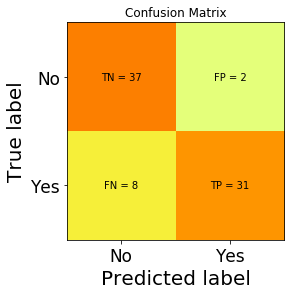

In [19]:
#Draw a confusion matrix
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No','Yes']
plt.title('Confusion Matrix',)
plt.ylabel('True label', fontsize =20)
plt.xlabel('Predicted label' , fontsize =20)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0, fontsize = 17)
plt.yticks(tick_marks, classNames, fontsize = 17)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment='center',verticalalignment='center' )

In [20]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        39
           1       0.94      0.79      0.86        39

   micro avg       0.87      0.87      0.87        78
   macro avg       0.88      0.87      0.87        78
weighted avg       0.88      0.87      0.87        78



In [21]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)

In [22]:
#Define a function for plotting ROC
def plotRoc(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, label="SVM (AUC: {})".format(round(auc,2)))
    plt.plot([0,1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate", fontsize = 23)
    plt.ylabel("True Positive Rate", fontsize = 23)
    plt.title("Reciever Operating Characterstic",fontsize = 23)
    plt.legend(loc="lower right", fontsize = 15)
    plt.show()

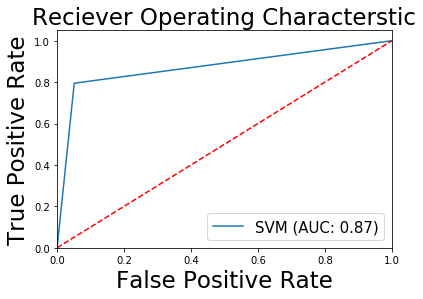

In [23]:
#Draw ROC curve
plotRoc(fpr,tpr)